# **Overview**

In this project, we will build an end-to-end business intelligence solution to analyze sales and supply chain data. We will start by integrating data from different sources to build a data warehouse, ensuring we have a single source of truth that is clean, consistent, and ready for analysis and reporting. Then, we will use the data warehouse to answer key business questions that will help stakeholders make data-driven decisions based on actionable insights.

### **Key Business Questions to Answer**

#### **Sales & Profitability Analysis**

* What are our total sales, profit, and average profit margin over time (Month-over-Month, Year-over-Year)?
* Which store departments and locations are the most profitable?
* Which destination markets and regions are driving the most sales versus the highest profit?
* Are high discounts actually leading to more sales?
* What is the cost of failure?

#### **Operational & Logistics Analysis**

* What is the On-Time Delivery (OTD) rate?
* What are the biggest drivers of late deliveries?
* Are our shipping modes worth their cost?

#### **Customer Behavior Analysis**

* Who are our best customers?

  * When was their last order?
  * How many orders have they placed?
  * What are their total sales?
* Does the *Corporate* segment have a higher average order value than *Home Office*?
* Do *Consumer* segment customers have a higher late delivery risk?
* What is the preferred payment type?

#### **Product Performance & Basket Analysis**

* What are our “hero” products?
* What are our “problem” products?
* Which products are frequently bought together?

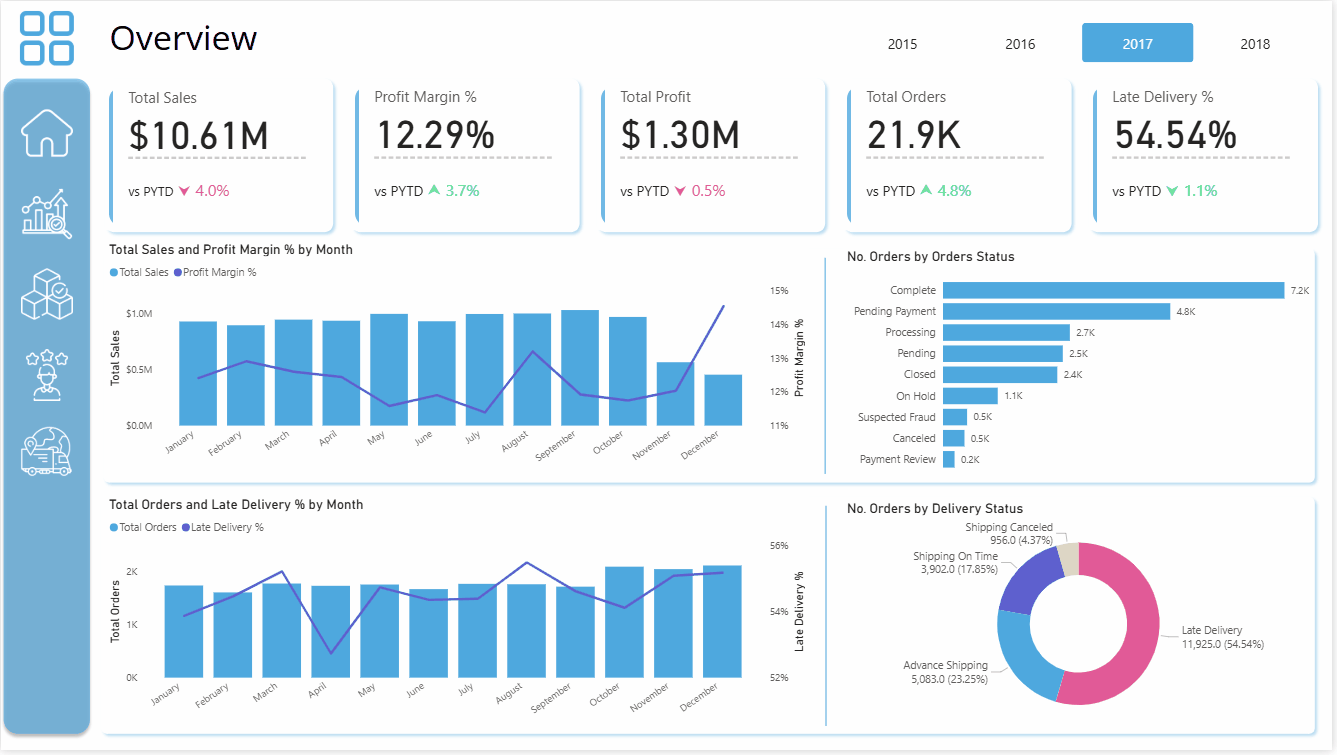

[![View Power BI Report](https://img.shields.io/badge/View%20Power%20BI%20Report-0078D4?style=for-the-badge&logo=power-bi&logoColor=white)](https://app.powerbi.com/view?r=eyJrIjoiNmYzYWMyMTktYzQ1MC00OWFhLThkYTItYWM1M2I2ZjlhZGVhIiwidCI6IjJiYjZlNWJjLWMxMDktNDdmYi05NDMzLWMxYzZmNGZhMzNmZiIsImMiOjl9)


# **Data Gathering**

The dataset used in this project was downloaded from the following link: [**DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS**](https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis/data)

---

### **Preparing the Data**

To simulate a real-world data integration scenario, I prepared the dataset by splitting the original flat file into multiple tables, each representing data from a different source system.

**CRM Source:**

* `crm_customers.csv`

**ERP Source:**

* `erp_order_headers.csv`
* `erp_order_items.csv`
* `erp_products.csv`
* `erp_categories.csv`
* `erp_shipping.csv`

**Store Source:**

* `store_departments.csv`
* `store_locations.csv`

# Data Warehouse Design
The approach we followed to build this data warehouse is the Medallion Architecture, where we design three layers: the Bronze layer (Staging), the Silver layer (Transformations), and the Gold layer (Reporting & Advanced Analytics).

#### Data Warehouse Architecture Diagram
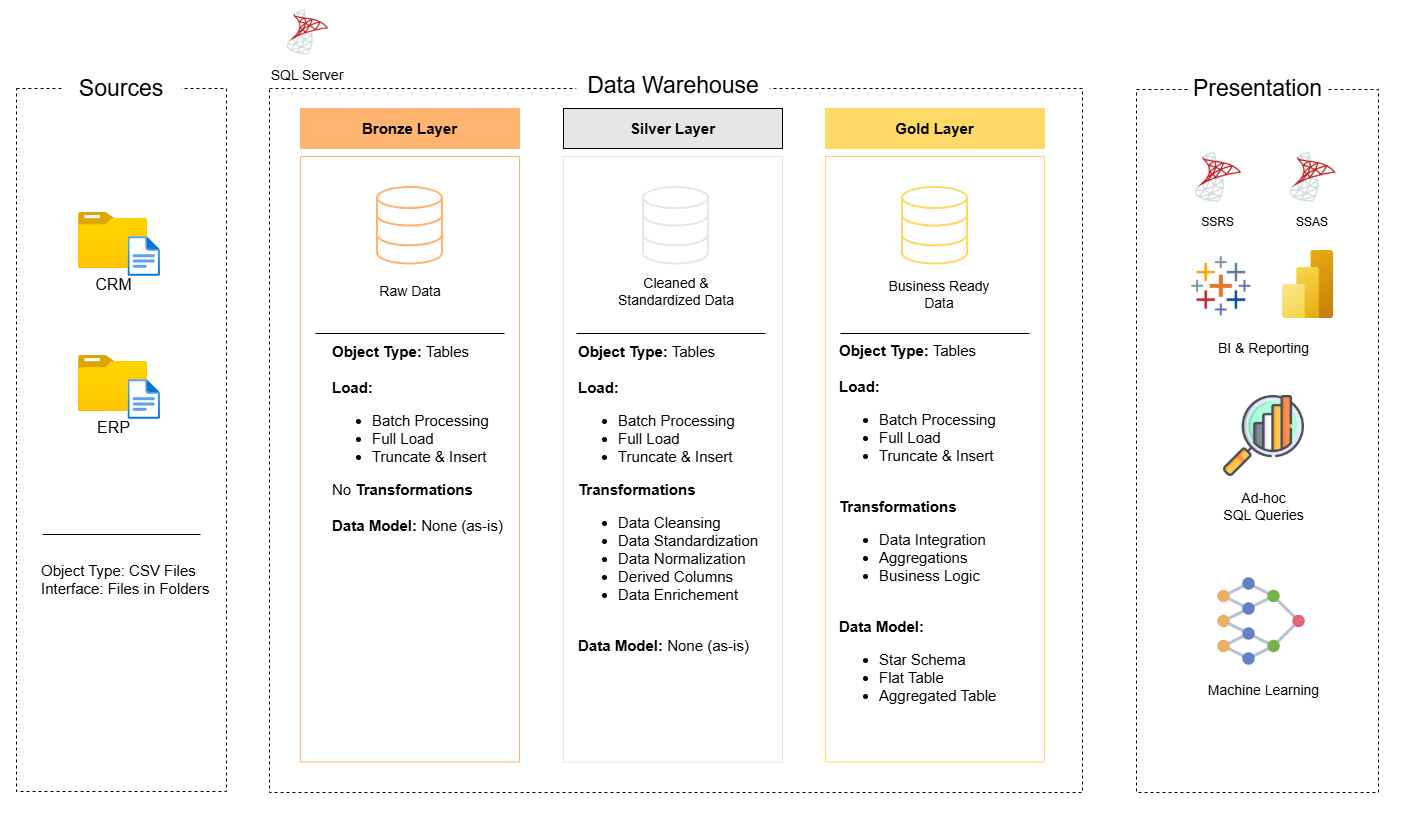

#### Data Warehouse Schema
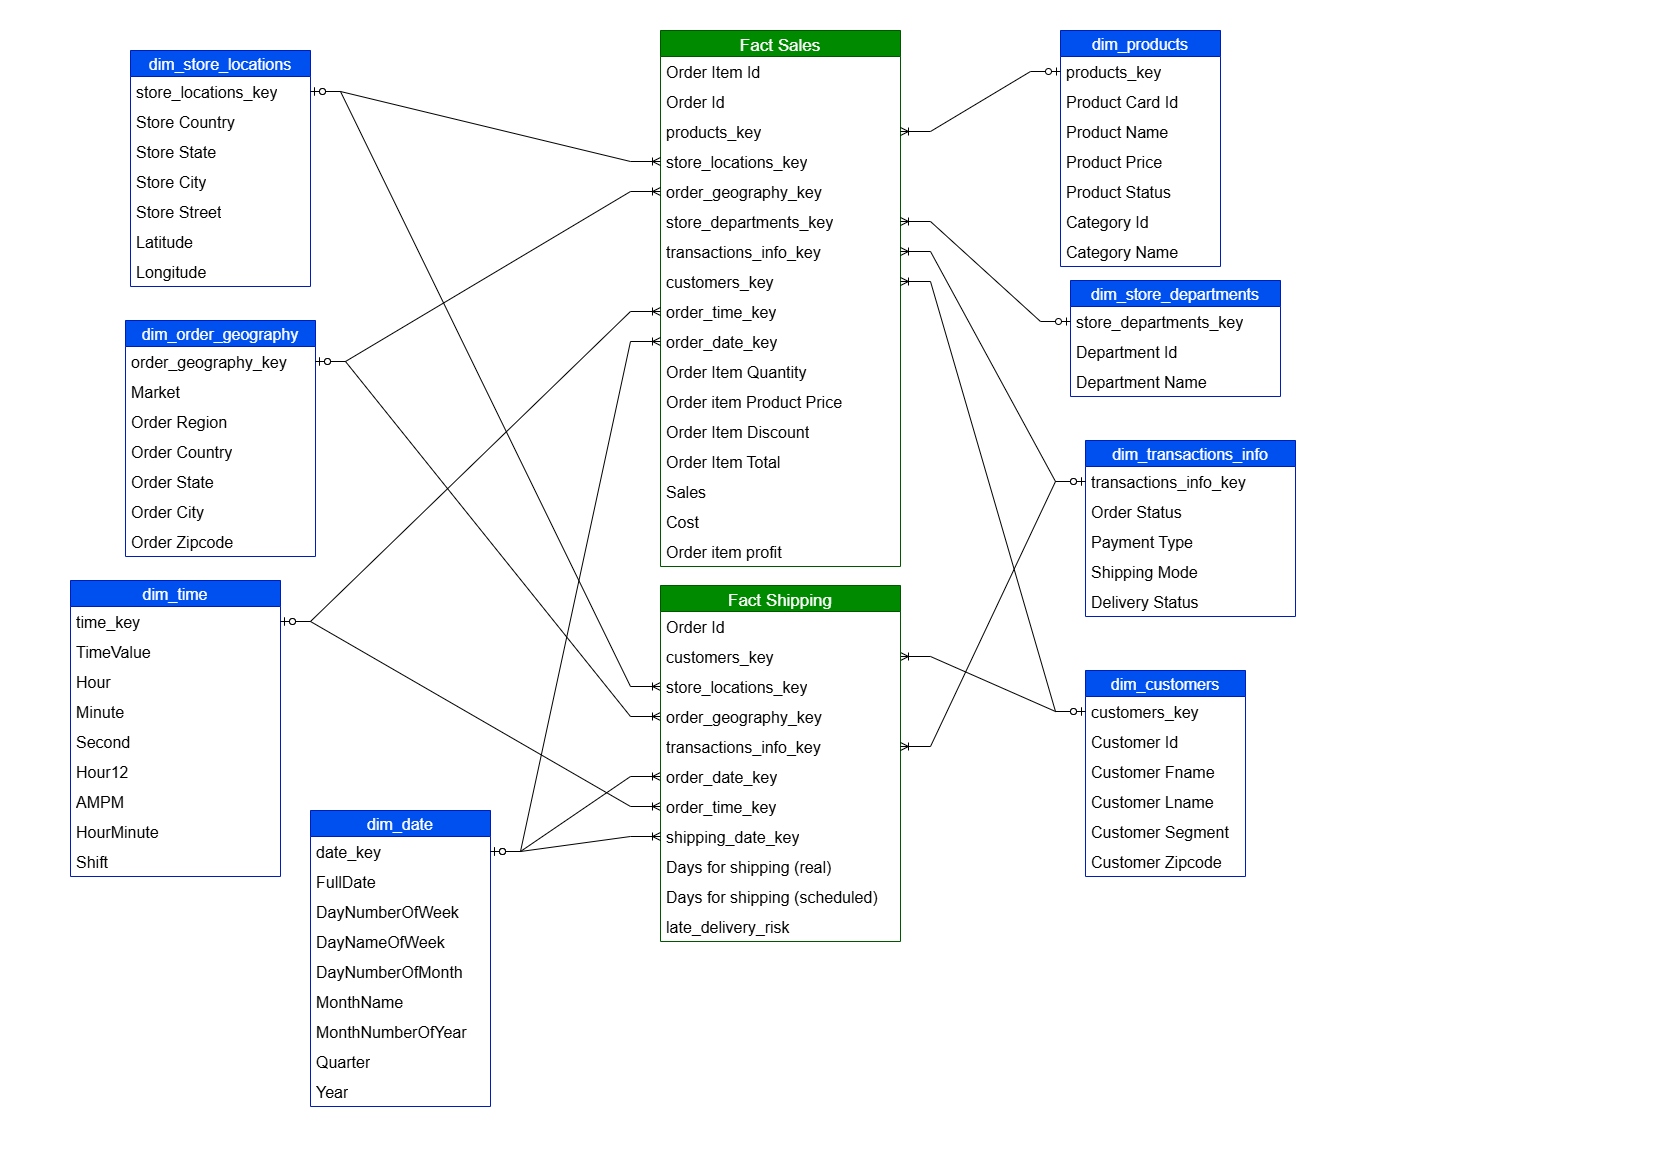

For more details about the data warehouse implementation, refer to the `DWH Implementation` folder.


# **Analysis**

After completing the data warehouse implementation and loading the data, we began using Power BI for the analysis. I started by loading the data into Power BI and opening Power Query to review everything and ensure the data was as expected.
Then, we built the data model, as shown in the image below, to match the data warehouse design.
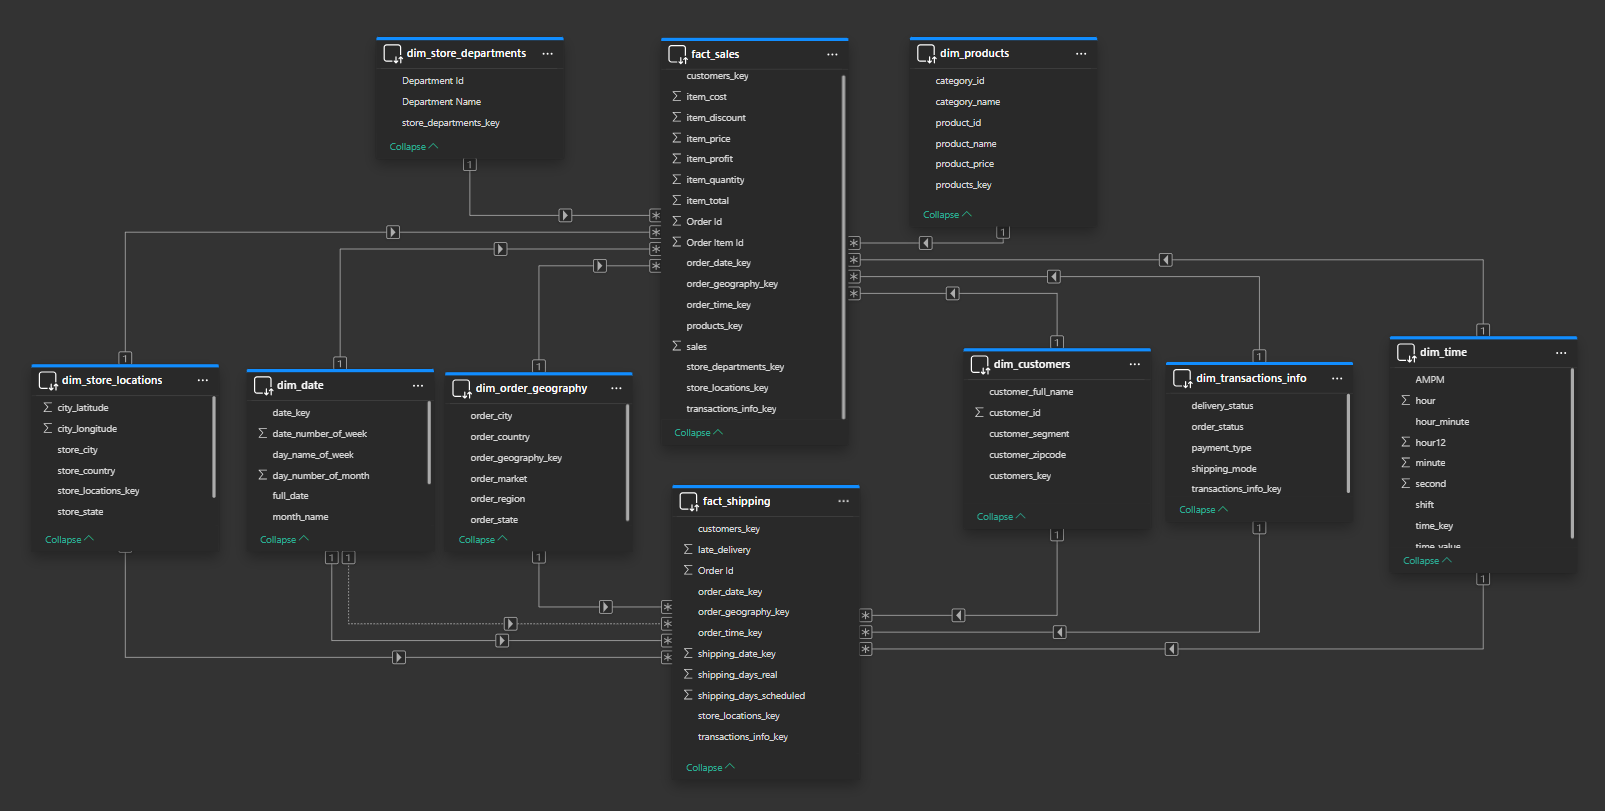


Next, we calculated the measures required for the analysis. We created a **Calculation Group** to house the logic for `YTD Growth %` and `MoM %`, enabling us to reuse these calculations across various KPIs.

We defined `YTD Growth %` as a modified Year-over-Year (YoY) analysis. This logic handles incomplete data in the final year by comparing only the existing months to the corresponding months of the previous year.

# Overview Page
On this page, we can analyze sales and logistics performance for a specific year and compare it to the previous year to assess our progress.

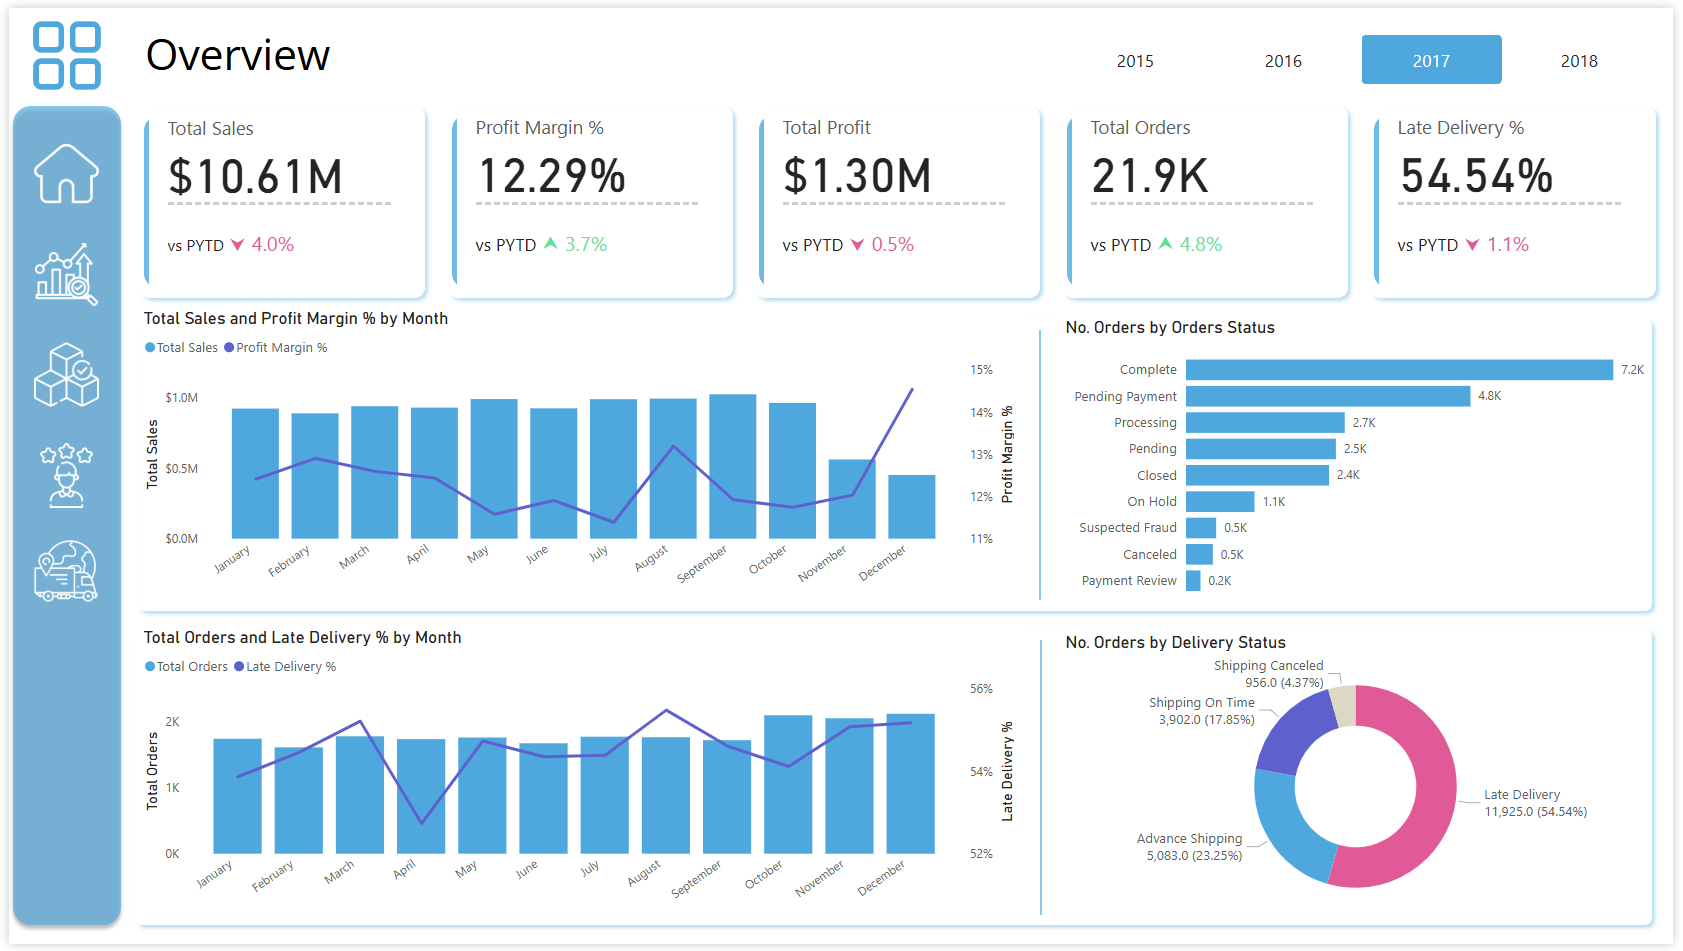

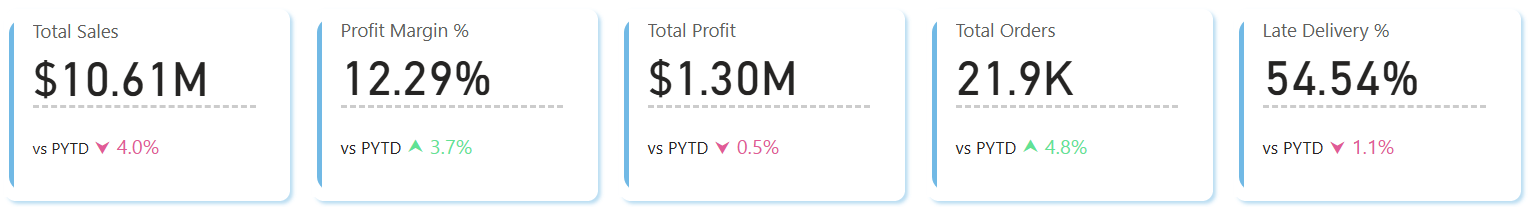

- Financial Performance: Generated \$10.61M in Revenue and \\$1.30M in Net Profit.
- Efficiency Gains: Despite a 4.0% decline in Revenue, Net Profit remained stable (-0.5%) driven by a strong 3.7% improvement in Profit Margins (rising to 12.29%).
- Volume Trends: Order volume increased by 4.8% (reaching 21.9K orders), indicating higher customer activity but a lower Average Order Value compared to the prior year.
- Operational Risk: Logistics remains a critical pain point, with a 54.54% Late Delivery Rate. Although this represents a 1.1% improvement YoY, more than half of customers are still experiencing delays.

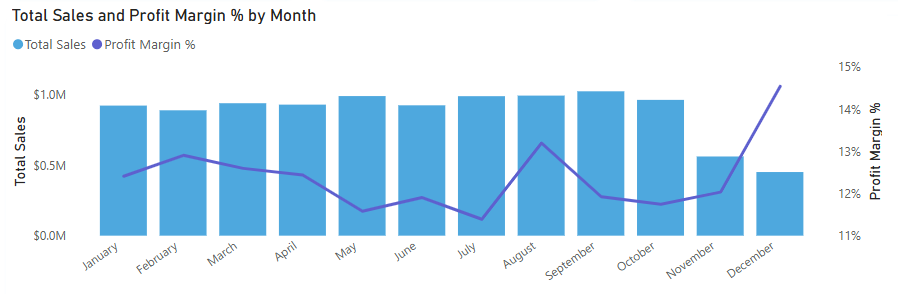
- Interestingly, we observed a divergence in Q4. While Total Sales dropped significantly in November and December, our Profit Margin actually hit a yearly high.

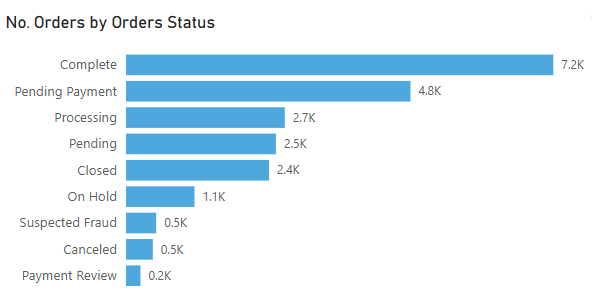
- A major anomaly in our data is that 22% of all orders (4.8K) are stuck in 'Pending Payment.' This is the second-highest status category, which signals a potential bottleneck in our revenue recognition.

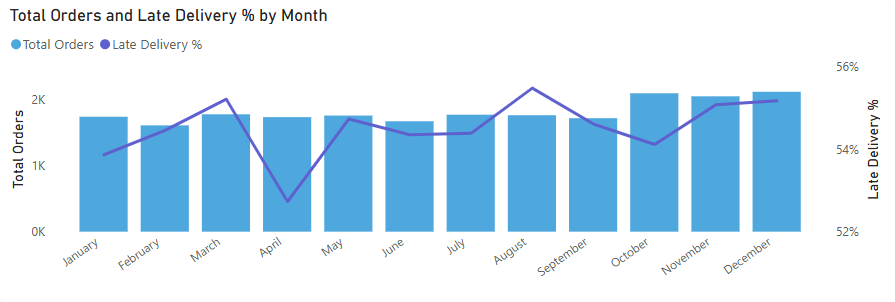
- While Order Count peaked in October, November, and December—indicating strong customer demand—Total Revenue actually declined as we saw in the previous `Total Sales and Profit Margin % by Month` chart.
- This suggests a distinct shift in consumer behavior during the holiday season. Customers pivoted away from high-ticket investment purchases (like equipment) and toward lower-value items (like accessories or gifts).
- Since we previously noted that Profit Margin increased in December, this shift to lower-value items was actually profitable. We sold cheaper items, but we kept more profit on each dollar sold compared to the big-ticket items.

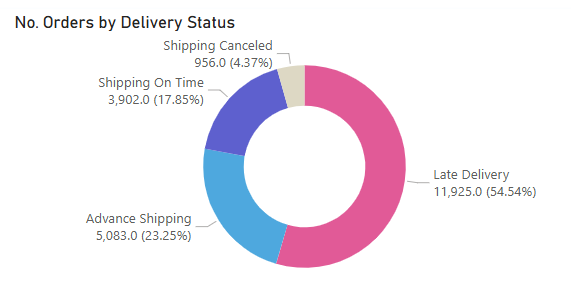

- The majority of orders were delivered late (54.54%). Advance shipping accounted for 23.25%, while 17.85% were on time and 4.37% were canceled.

# Time & Seasonality Analysis
On this page, we can look at the analysis for different KPIs over time to spot trends and to find its reasons.
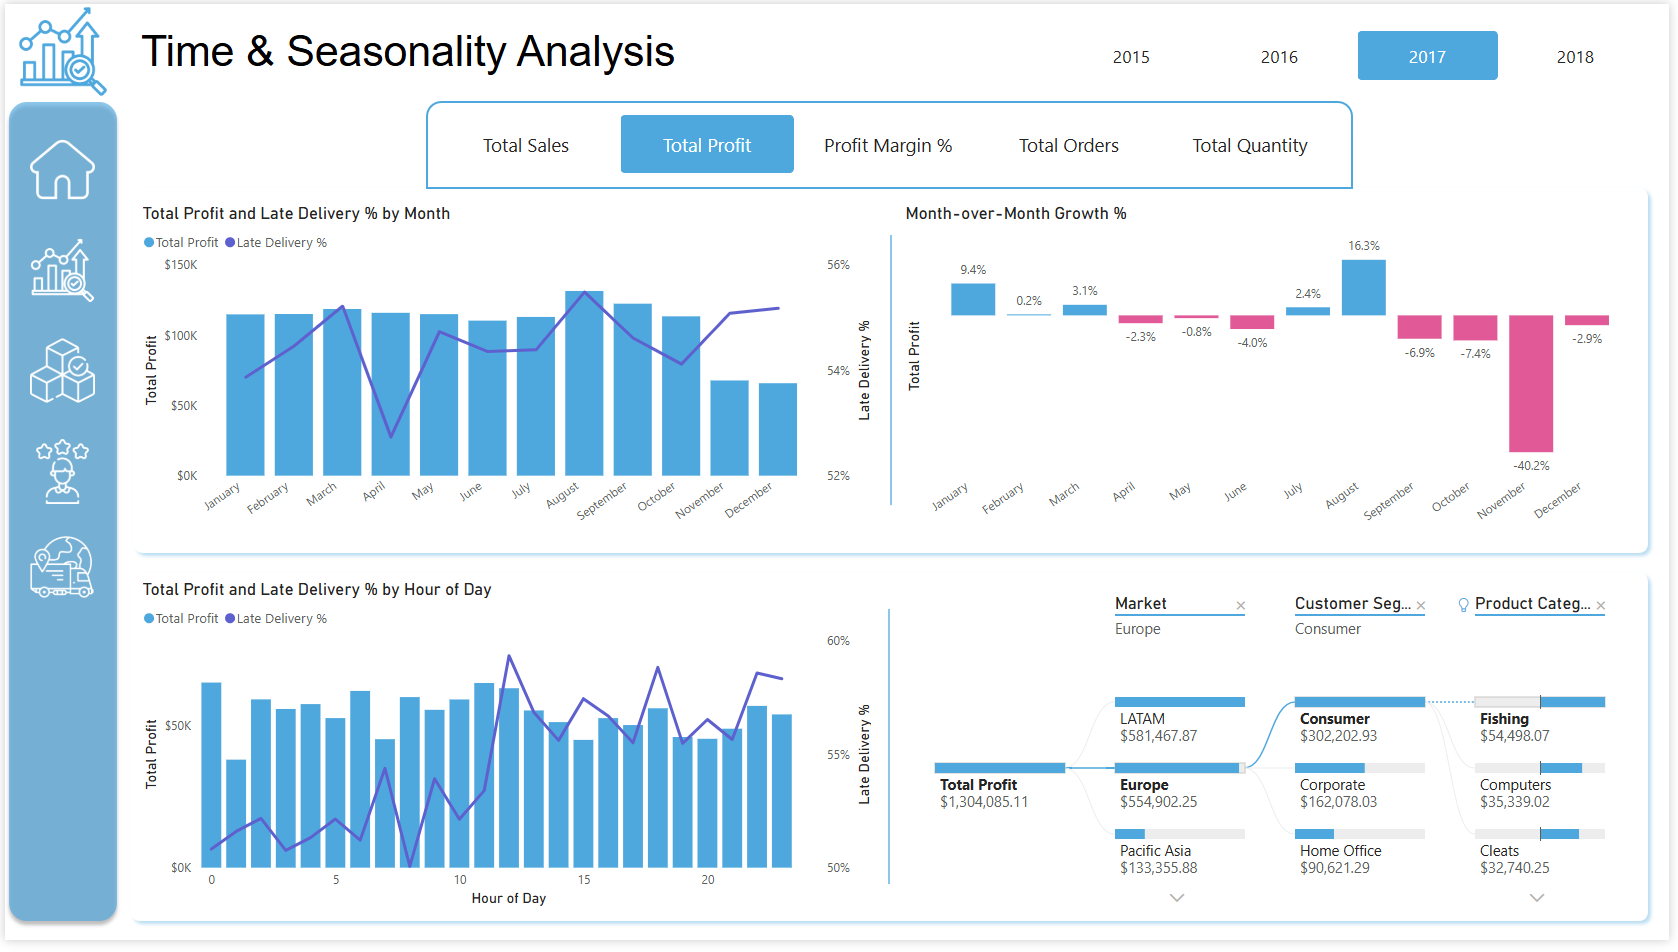

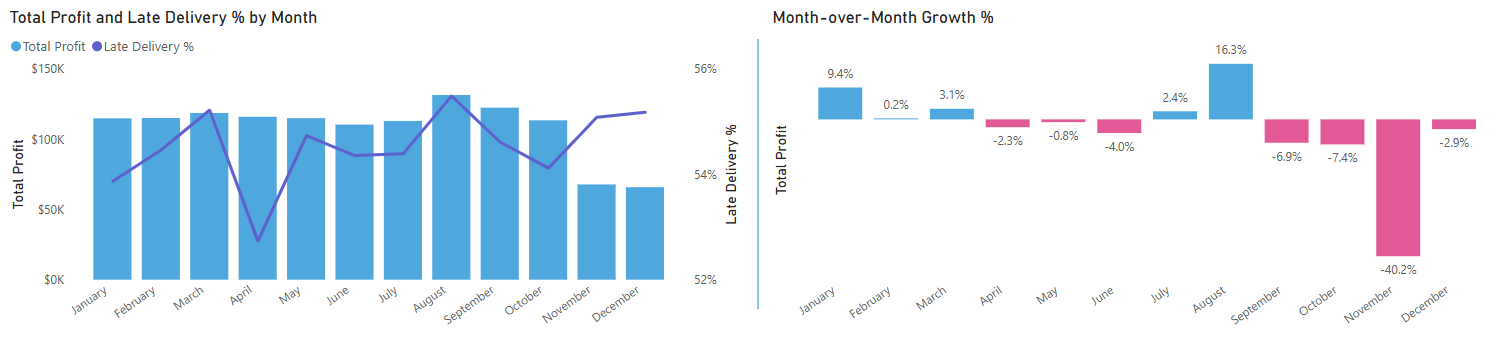
- August was our most profitable month of the year, but it coincided with our highest Late Delivery rate (~55%). This indicates that our supply chain struggles to handle peak volume.
- We observed extreme volatility in Q4. November saw a massive -40.2% drop in profit compared to October, the most significant decline of the year. This sharp contraction in November is highly unusual for a retail business (which typically peaks in Nov/Dec).
- Conversely, August showed the strongest momentum, with a +16.3% month-over-month increase in profit.

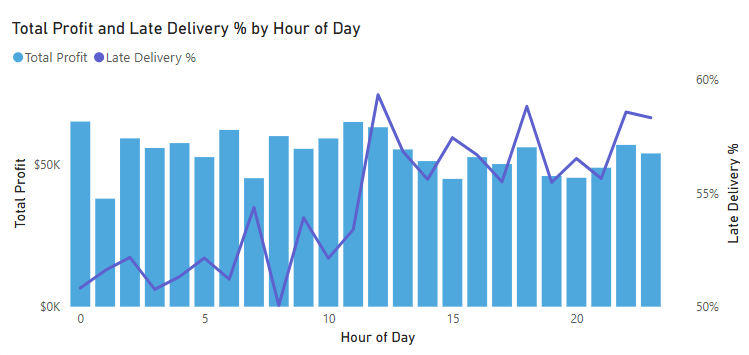
- Late delivery rates are notably lower for orders placed in the early morning hours. As the day progresses, there is a gradual and consistent increase in the percentage of late deliveries.
- This trend suggests a potential bottleneck in the order processing or fulfillment workflow as daily volume accumulates. It could indicate that:
    - Warehouse operations become overwhelmed later in the day.
    - Carrier pickup cutoff times are creating a backlog for afternoon/evening orders, pushing their effective ship date to the next day.

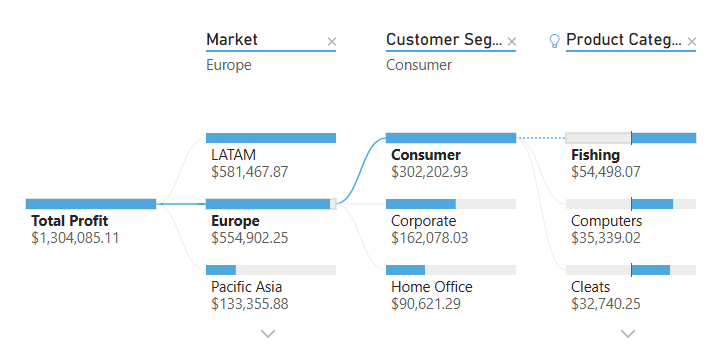
- In 2017, the Europe Market was a key profit center, generating \\\$554,902.25 in Net Profit. The primary driver of this profit was the Consumer segment (contributing \\$302,202.93), significantly outperforming Corporate and Home Office segments. Drilling deeper into the Consumer segment in Europe, we found that the Fishing category was the top performer, generating \$54,498 in profit. This suggests a strong product-market fit for outdoor/fishing equipment among European consumers.

# Product Performance
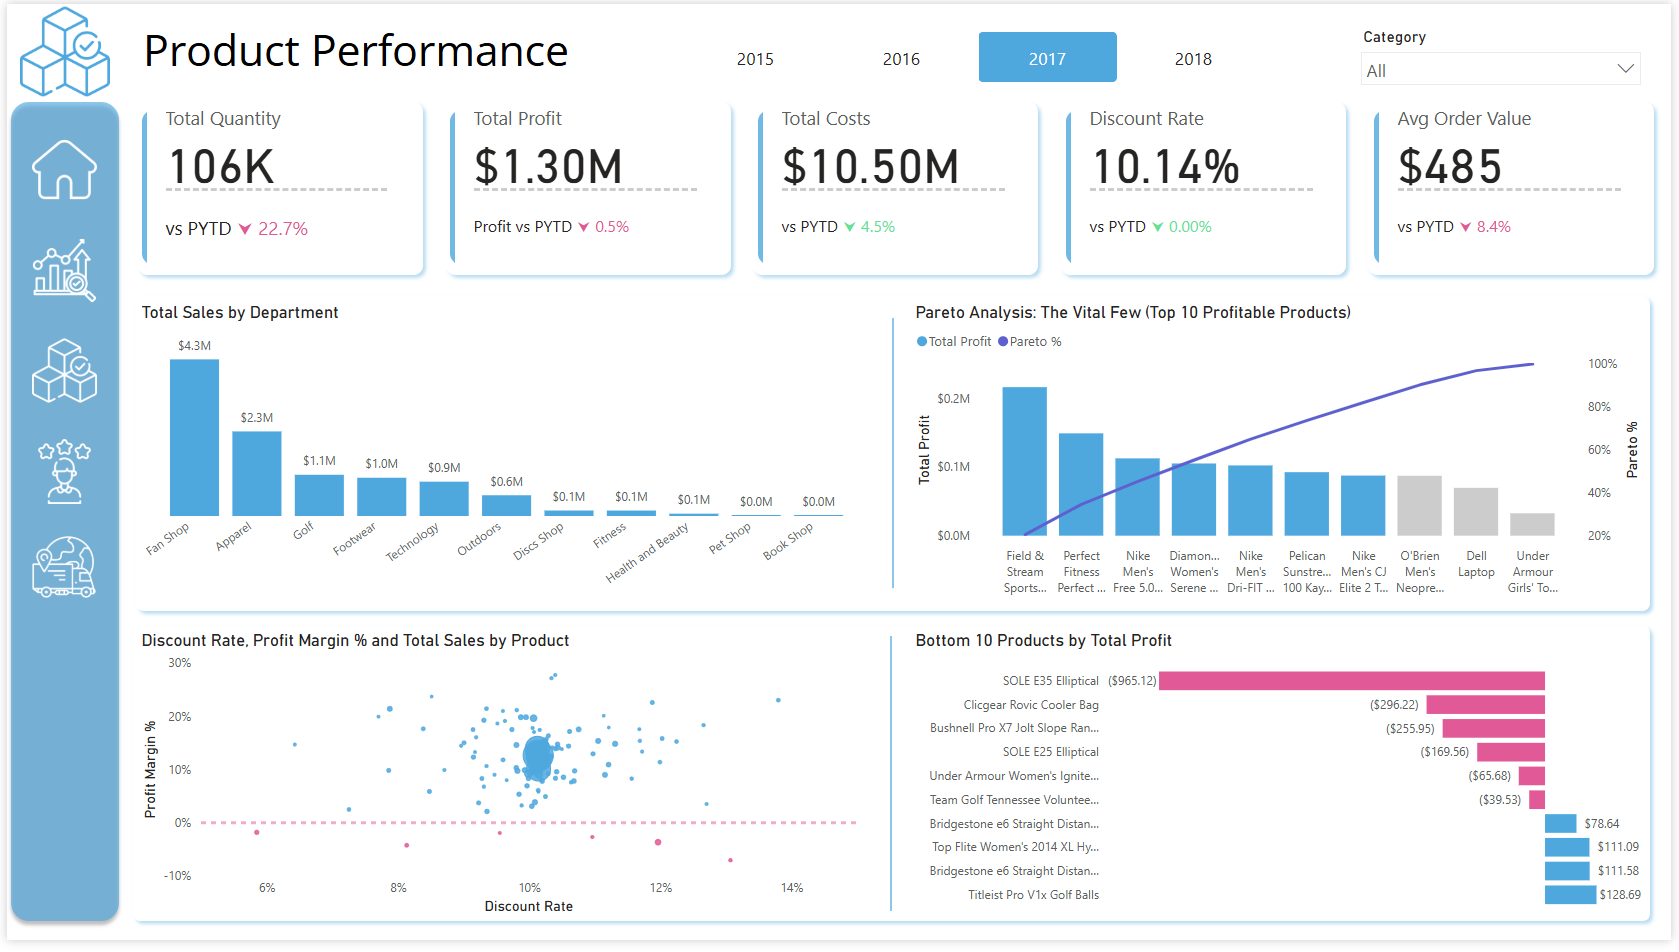

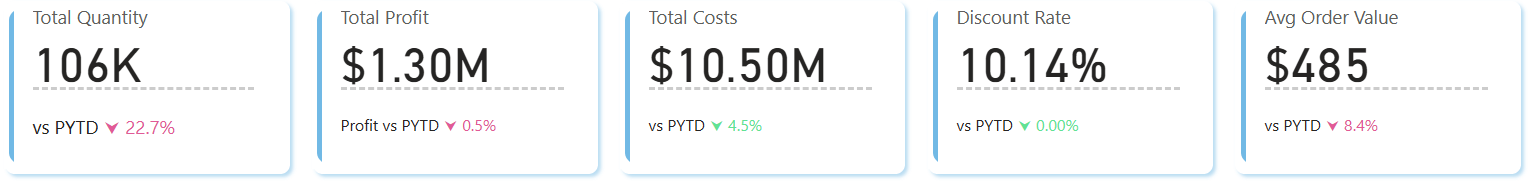
- In 2017, total volume contracted significantly, with 106K items sold—a 22.7% decline year-over-year.
- This drop in volume was compounded by a decrease in basket value, as the Average Order Value (AOV) fell by 8.4% to $485.
- The combined drop in both Quantity (-22%) and AOV (-8%) signals a broad softening in demand. We aren't just losing customers; the customers we do have are buying fewer, cheaper items.

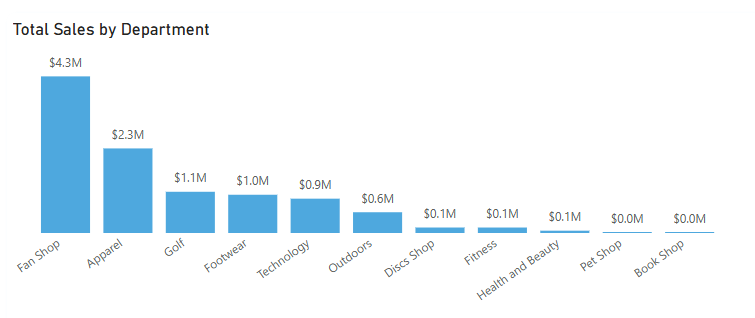
- The `Fan Shop` department generated the highest sales revenue, reaching approximately \\$4.3 million.
- This figure is notably higher than the second-highest department, `Apparel`, which generated \$2.3 million.

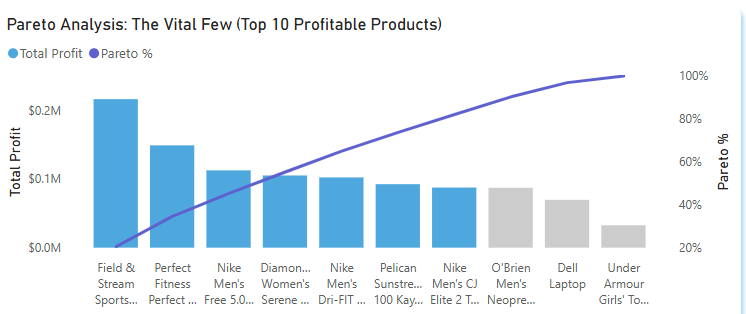
- Our product portfolio exhibits a high degree of profit concentration. A Pareto analysis revealed that just 7 products (out of 118) generate 80% of the company's total profit.
- This extreme skew indicates that our business model currently relies heavily on a small number of "Hero" products, creating a significant dependency risk.

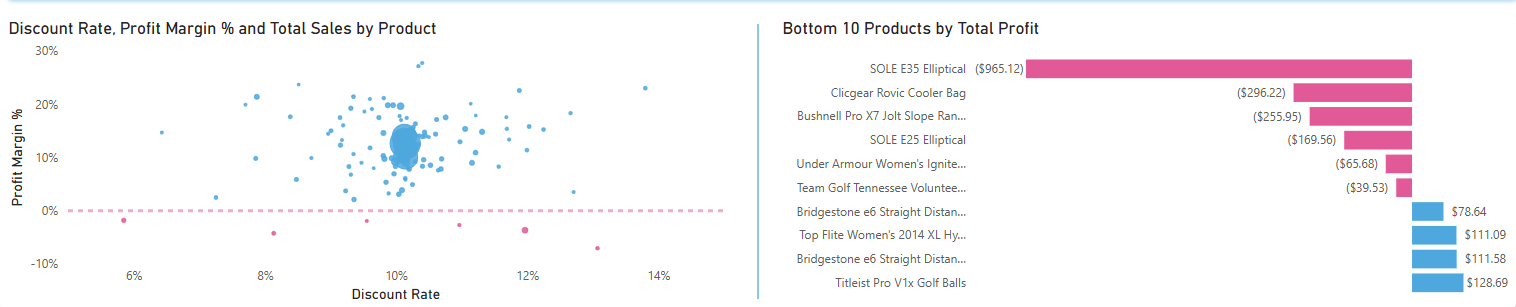
- The scatter plot reveals a consistent pricing strategy, with the majority of products clustered around a 10% discount rate and maintaining a healthy 10-15% profit margin. This indicates that the general discount policy is sustainable.
- However, we identified 6 specific products that are generating negative profit margins. These products sit below the break-even line (0% margin) on the scatter plot.
- The Bottom 10 Products by Total Profit chart highlights the financial impact. For example, the "SOLE E35 Elliptical" alone is responsible for a $965 loss
- We should immediately cease discounts on these 6 loss-making products. A pricing review is required to either increase their base price or negotiate lower costs with suppliers to restore profitability.

# Customer Performance
On this page, we will look at the RFM Customer Segmentation Analysis. We have already assumed that customers who did not make a purchase in the last year are considered churned customers. We also built the RFM customer segmentation logic in the Gold Layer. Refer to the data warehouse documentation for more details.

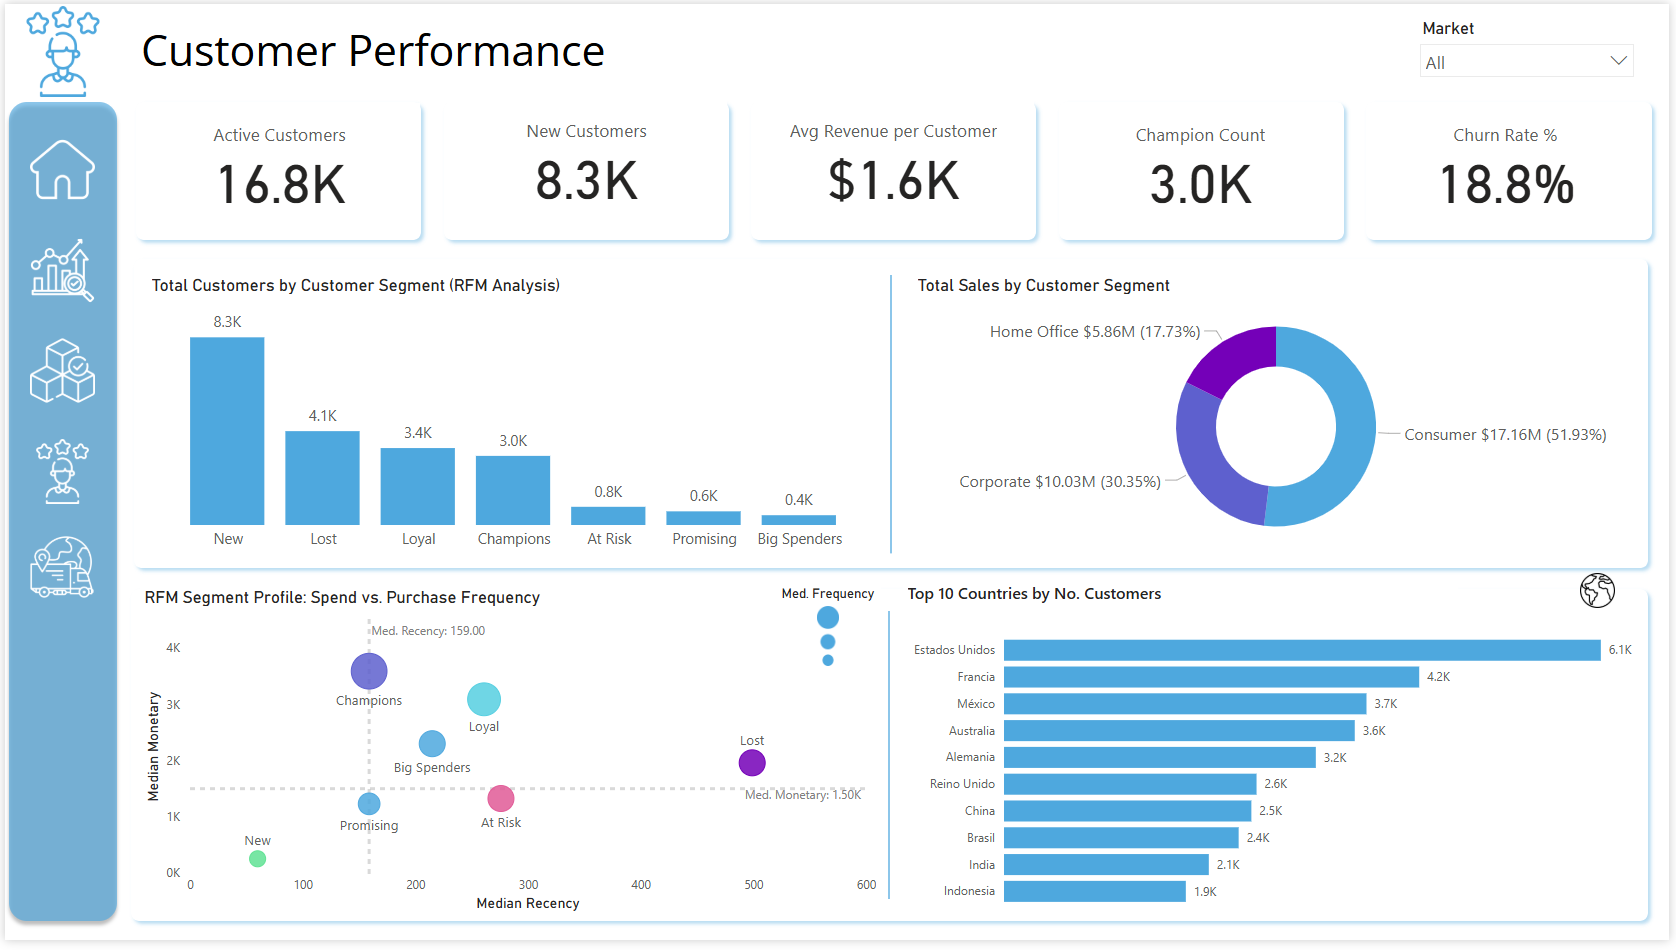

- Our customer base analysis reveals a total of 16.8K Active Customers.
- A significant portion of this growth is driven by new acquisition, with 8.3K New Customers joining in the last 12 months. The Average Revenue per Customer stands at a healthy $1.6K.
- Through our RFM segmentation model, we identified 3K Champion Customers, representing our most valuable and loyal segment.
- However, retention remains a key focus area, as the current Churn Rate is 18.8%, indicating nearly 1 in 5 customers has become inactive in the last year.

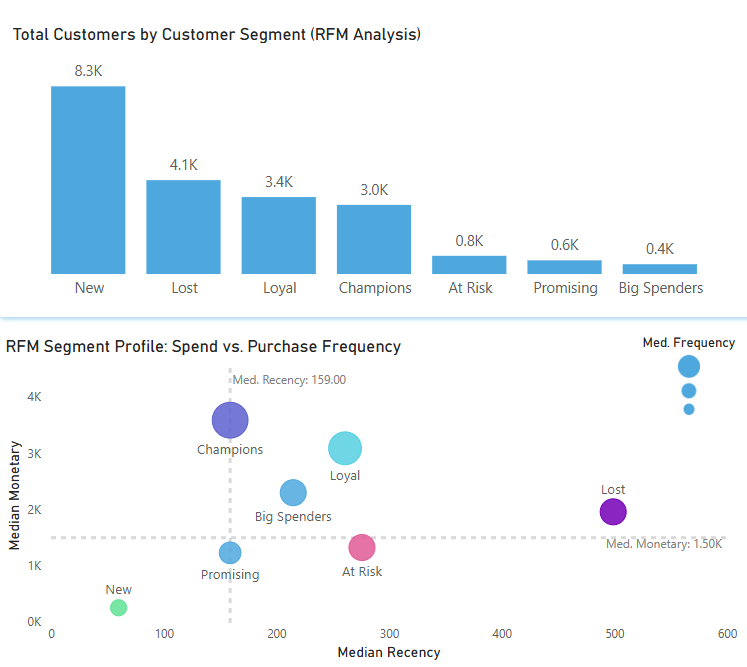
- Our customer base is dominated by New Customers (8.3K), indicating strong acquisition. However, the second-largest group is Lost Customers (4.1K), representing a significant retention challenge.
- The RFM Scatter Plot clearly delineates the value gap. Champions (Purple) are high-frequency, high-spend users, while Lost Customers (Cyan) are completely disengaged with high recency.
- Immediate Win: Launch a targeted "Win-Back" email campaign specifically for the 4.1K Lost Customers, offering a strong incentive to return.
- Long-Term Strategy: Develop a "Nurture Series" for the 8.3K New Customers to drive their second purchase and move them into the "Loyal" segment before they churn.

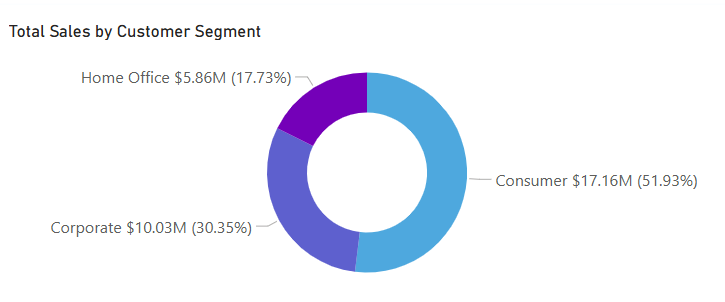

- The Consumer segment is the clear leader, contributing over half of the total sales (\\\$17.16M, 51.93%). This indicates that B2C (Business-to-Consumer) is the primary revenue engine.
- The Corporate segment is also significant, generating nearly a third of total revenue (\\$10.03M, 30.35%). This suggests a healthy diversification between individual and business buyers.
- The Home Office segment, while the smallest, still contributes a meaningful \$5.86M (17.73%).

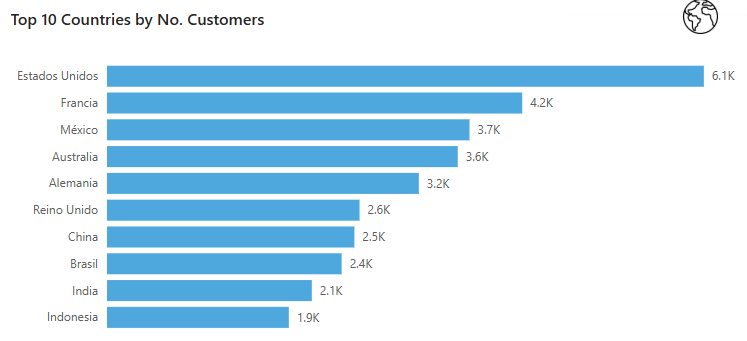
- Estados Unidos (United States) clearly leads with 6.1K customers, making it the primary market for the business.
- Francia (France) follows with 4.2K, showing a significant customer base in Europe.
- There's a steady distribution across other major countries like México (3.7K), Australia (3.6K), and Alemania (Germany) (3.2K).


# Logistics Performance
On this page, we take a look at logistics performance by comparing actual shipping days with scheduled shipping days across different shipping modes. We also examine the distribution of late delivery percentages for each mode and identify the stores with the highest late delivery rates.

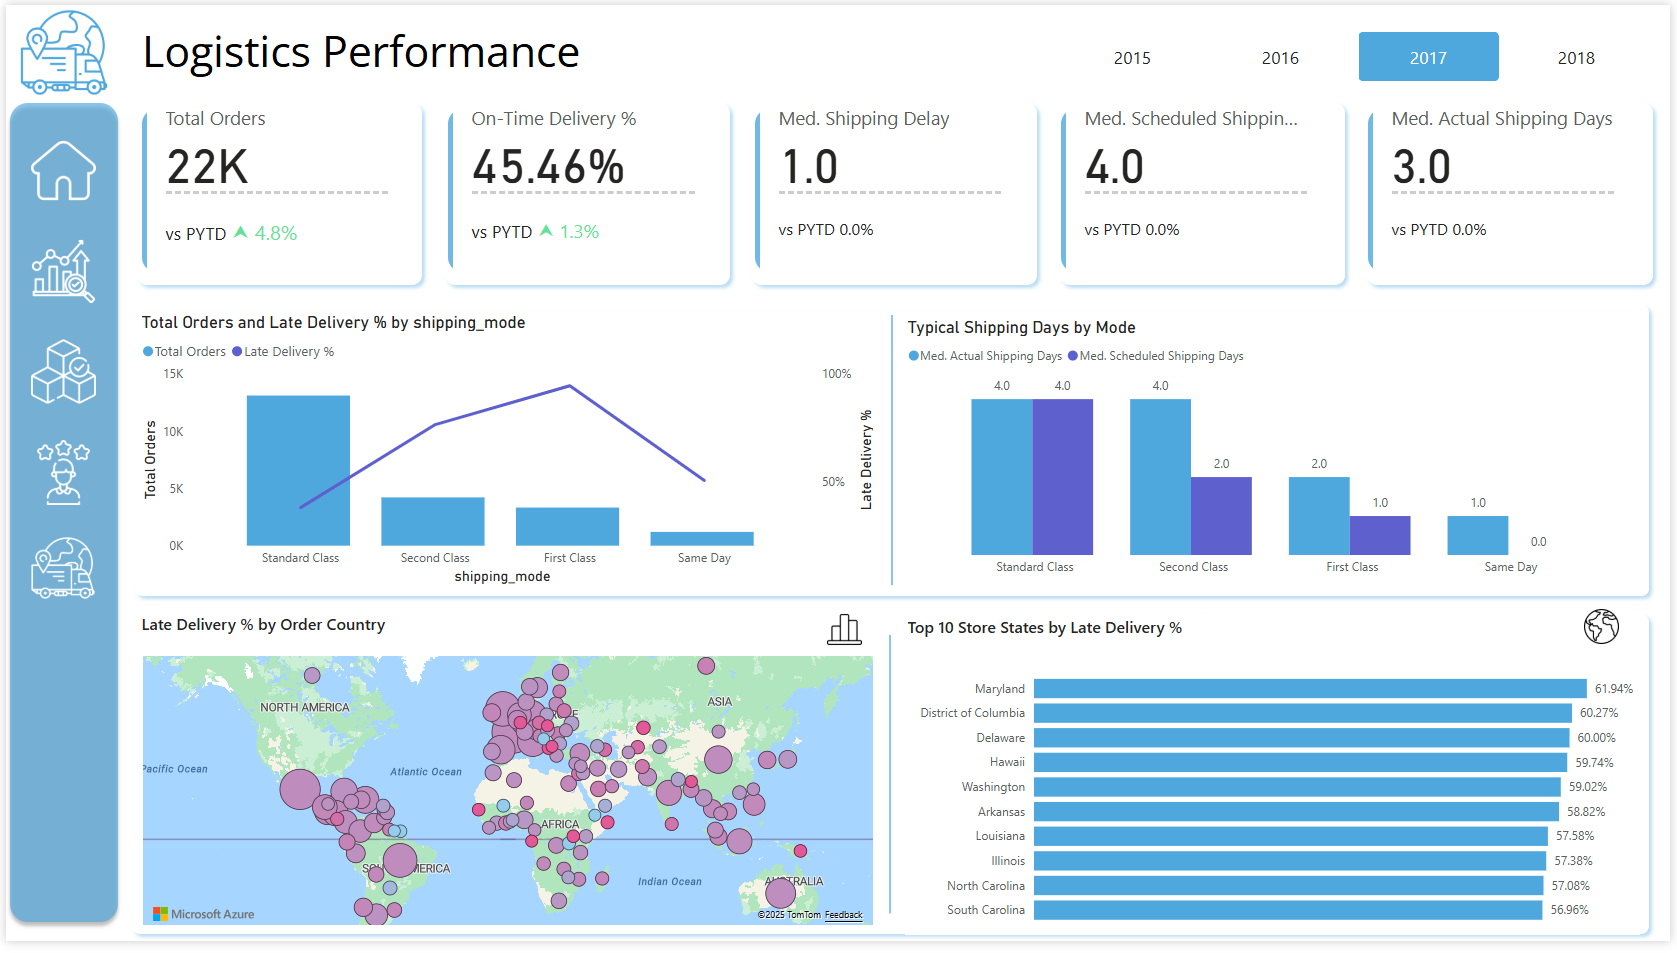

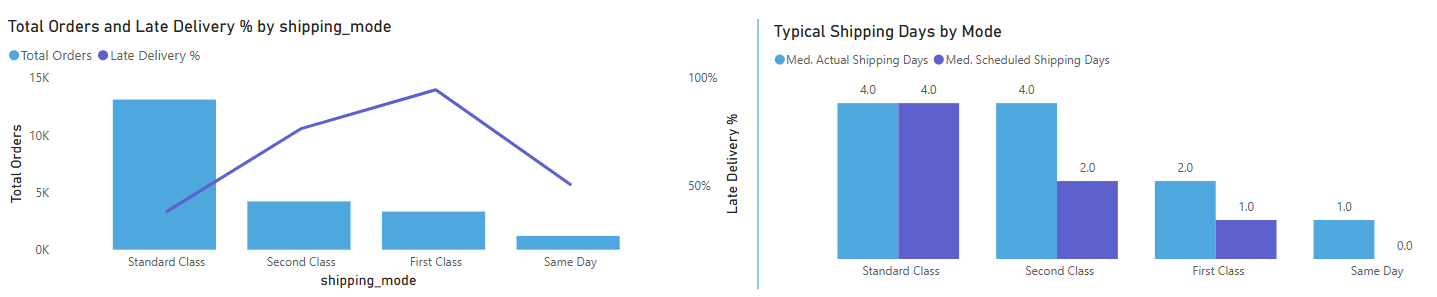
- The On-Time Delivery rate stands at 45.46%, showing a slight improvement of +1.3% year-over-year. While the median actual shipping time (3 days) is faster than the median scheduled time (4 days) on aggregate, individual order delays remain a significant issue.
- The Standard Class shipping mode is the most utilized, handling over 12,000 orders. It performs consistently, with both scheduled and actual shipping times aligning at a median of 4 days. Notably, it has a lower Late Delivery rate compared to expedited options like First Class.
- Second Class: This mode consistently underperforms. The median actual delivery time is 4 days, despite a scheduled promise of 2 days. This discrepancy is a major driver of late deliveries.
- First Class: Similarly, First Class shipments take a median of 2 days to arrive, missing the scheduled target of 1 day. It has the highest late delivery rate.
- The premium "fast shipping" options (First and Second Class) are failing to meet their promised service levels (SLAs), while the slower "Standard Class" is more reliable. This suggests we are over-promising and under-delivering on speed.

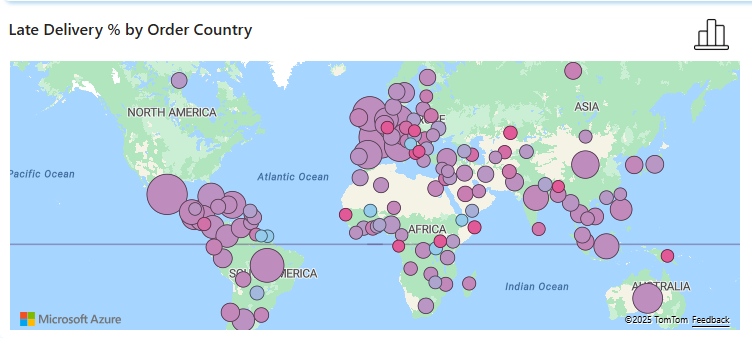

- This map visually answers the question: Which countries have the worst delivery performance?
- This map allows logistics managers to pinpoint specific countries where the supply chain is failing (e.g., customs delays in Brazil) vs. countries where it is working well.

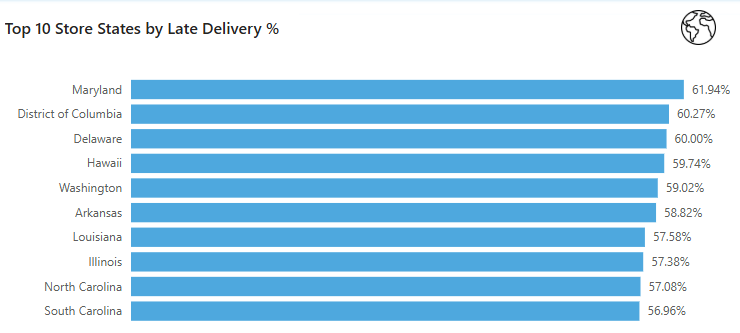
- The chart shows exceptionally high late delivery rates across these top 10 states, with all of them hovering around or exceeding 57%.
- Maryland leads the list with a late delivery rate of 61.94%, indicating a significant logistics issue in that region.
- The difference between the top state (Maryland) and the 10th state (South Carolina at 56.96%) is relatively small (~5%). This suggests that the late delivery problem is systemic across these high-volume regions, rather than isolated to one specific location.
- The list includes states from various regions (East Coast: MD, DC, DE; West Coast: WA; South: AR, LA, SC; Midwest: IL; Pacific: HI). This widespread distribution reinforces the idea that the issue lies in the central supply chain or carrier network, not just a regional weather event.

# Recommendations

### **1. Sales & Profitability Strategy**
* **Prioritize Profit over Volume:** The analysis revealed that while sales volume dropped, profit margins improved. Continue the strategy of reducing unprofitable discounts and focusing on high-margin sales.
* **Dynamic Pricing:** Implement dynamic pricing strategies during peak seasons (like November and December) to maximize margin when demand is high, as observed in the Q4 anomaly.
* **Fix the Payment Bottleneck:** Investigate and resolve the "Pending Payment" issue immediately. Recovering even a fraction of these 4,800 orders represents a significant revenue opportunity.

### **2. Logistics & Operations Optimization**
* **Address the "Afternoon Bottleneck":** Implement a second warehouse shift or negotiate a later carrier pickup time to handle orders placed after 12 PM, which are disproportionately late.
* **Review Carrier Performance:** The stark difference in performance between Standard Class (reliable) and expedited modes (First/Second Class) suggests a need to renegotiate contracts or switch carriers for premium shipping options.
* **Regional Logistics Hubs:** Consider establishing regional distribution centers in key markets like Europe and LATAM to reduce shipping times and improve customer satisfaction in these high-volume, high-churn regions.

### **3. Product Portfolio Management**
* **Protect the "Vital Few":** Ensure 100% stock availability for the top 7 products that drive 80% of profits. Any stockout here is a major risk.
* **Eliminate "Discount Traps":** Stop discounting products like the "SOLE E35 Elliptical" that generate negative profit. Re-evaluate the pricing strategy for the bottom 10 profitable products.
* **Cross-Sell Opportunities:** Leverage the decomposition tree insights to create targeted bundles (e.g., Fishing gear for European consumers) to increase Average Order Value.

### **4. Customer Retention & Growth**
* **Targeted "Win-Back" Campaigns:** Launch specific email campaigns for the 4.1K "Lost" customers who were previously high-value, offering incentives to return.
* **Nurture New Customers:** Develop an onboarding series for the 8.3K "New" customers to encourage a second purchase within 6 months, moving them into the "Loyal" segment.
* **VIP Treatment:** Create an exclusive loyalty program for the 3K "Champions" to maintain their high frequency and spend.
